# Naive representation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import struct

import qiskit
from qiskit import *

In [2]:
# float to binary 
def float_to_bin_real(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')
def float_to_bin_imag(num):
    return format(struct.unpack('!I', struct.pack('!f', num))[0], '032b')

# binary to float
def bin_to_float_real(binary):
    return struct.unpack('!f',struct.pack('!I', int(binary, 2)))[0]
def bin_to_float_imag(binary):
    return struct.unpack('!f',struct.pack('!I', int(binary, 2)))[0]

# reverse a string (for the measurement step readout)
def reverse(string):
    string = string[::-1]
    return string

In [3]:
# image of the sky filled with double precision complex floats (single precision for reals/imaginaries)
# few pixels are set to relatively large complex random values in random spots (image sources)
# relatively small complex values are added (white noise from background radiations) 

n = 10 #number of antennas

sky_image = np.zeros((n, n), dtype='complex64')
mask = np.zeros((n, n), dtype='bool')
stars = np.random.randint(1, 11) #random number of sources
radius = 1 #np.random.randint(1, 3) #with random radius

for i in range(0, stars):
    index_i = np.random.randint(0, sky_image.shape[0]-radius)
    index_j = np.random.randint(0, sky_image.shape[1]-radius)
    for j in range(0, radius):
        for k in range(0, radius):
            sky_image[index_i+j][index_j+k] = complex(np.random.rand()*100, np.random.rand()*100)
            mask[index_i+j][index_j+k] = True
            
sky_image.real += np.random.randn(n,n)/100
sky_image.imag += np.random.randn(n,n)/100

print(sky_image)

[[-9.79822502e-03+9.91198421e-03j -3.26865329e-03-7.41205225e-03j
   2.70620501e-03-1.67917330e-02j -7.22035719e-03-6.20893715e-03j
   1.06661944e-02-6.90225186e-03j  9.75444717e+01+2.02453003e+01j
   6.98550720e+01+4.02459068e+01j  7.07066804e-03-1.15218554e-02j
  -8.63064139e-04+7.44694797e-03j -4.76524280e-03+1.48997363e-02j]
 [-1.34093314e-02+2.01784428e-02j  3.71163548e-03+1.12595903e-02j
  -1.39087101e-03-4.53997683e-03j  2.18777191e-02-1.71075501e-02j
   7.11918948e-03-6.72707893e-03j  2.06085033e+01+2.75555382e+01j
  -9.32152662e-03+1.78378075e-02j  1.12778712e-02+1.27095904e-04j
  -4.25450783e-03-4.19848785e-03j  1.53271900e-02-1.44975074e-02j]
 [ 3.72063019e-03-3.59393540e-04j  1.63484272e-02-1.52307493e-03j
  -1.64198801e-02-2.75165634e-03j -6.23528147e-03+4.38940432e-03j
  -4.84450767e-03-8.90939869e-03j -1.59791892e-03-2.29314528e-03j
   1.87524012e-03-3.75279854e-03j  2.13133171e-03-8.90138932e-03j
   8.32952347e+01+5.38020477e+01j -8.14855006e-03+9.53827985e-03j]
 [-1.78

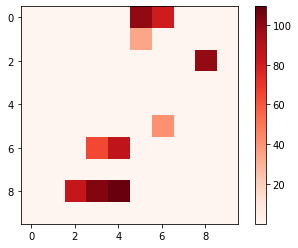

In [4]:
modulus = np.absolute(sky_image)
plt.imshow(modulus, cmap='Reds') 
cbar = plt.colorbar()

In [5]:
visibilities = np.fft.fft2(sky_image).astype('complex64')
print(visibilities)

[[ 643.7584   +411.1549j    -225.33534  -333.1932j
   -88.98122  +105.397224j  -110.20474   -27.835077j
    83.09289   -98.903435j   174.32013  +128.75827j
   -94.47449   +41.705338j   -26.935934  +23.747908j
    47.23707  -220.3309j    -402.75348   -30.389072j ]
 [  89.9775   +231.77287j    202.39081   +95.11207j
    50.64444  -118.94358j   -238.05106  +103.54119j
    20.86412  -180.61154j    -69.40714   +44.4379j
   311.1107    +98.79856j   -217.59717   -17.61589j
   179.6043   +121.14652j   -329.4414   -377.36835j  ]
 [  15.322249   -6.1139126j -134.45415   +72.088745j
   413.8403    -44.78994j   -236.1586   +176.74115j
    63.57953  -130.4623j    -179.12587   -92.76046j
    40.337418  +48.900375j   140.64883   +30.838135j
   117.64861  +178.56563j   -241.42104  -232.53665j  ]
 [-136.06383  -138.99283j   -244.76573  +123.83774j
   299.6417   -142.22275j    -45.892567 +120.47535j
    96.29936   +65.96723j   -141.69608   -30.73815j
     7.310904 -138.517j     -174.98811   -66.647644j


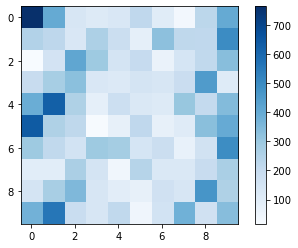

In [6]:
modulus = np.absolute(visibilities)
plt.imshow(modulus, cmap='Blues')
plt.colorbar();

In [7]:
sanity = np.fft.ifft2(visibilities).astype('complex64')

test1_real = ((sky_image.real - sanity.real)**2).mean()
test1_imag = ((sky_image.imag - sanity.imag)**2).mean()
 
print('Reals MSE: '+ str(test1_real))
print('Imaginaries MSE: '+ str(test1_imag))

Reals MSE: 4.4048847e-13
Imaginaries MSE: 2.2017705e-13


In [8]:
from numpy import pi
# importing Qiskit
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram, plot_bloch_multivector

In [9]:
# encoding binary data onto qubits
def binary_encode(qc, binary, off_set):
    
    for i in range(0, len(binary)):
        qc.reset(off_set+i) # set quantum state |0> by default for all qubits

        if binary[i]=='1':
            qc.x(off_set+i) # act as a CX (controlled X gate)
    
    off_set += len(binary)

    return off_set

In [10]:
number_of_entries = visibilities.shape[0] * visibilities.shape[1]
number_of_bits_real = 32
number_of_bits_imag = 32
number_of_bits = number_of_bits_real + number_of_bits_imag
off_set = 0

# encoding (n bits encoded onto n qubits)
qc = QuantumCircuit(number_of_entries*number_of_bits)
for i in range(0, visibilities.shape[0]):
    for j in range(0, visibilities.shape[1]):
            binary_real = float_to_bin_real(visibilities[i, j].real)
            binary_imag = float_to_bin_imag(visibilities[i, j].imag)
            binary = binary_real+binary_imag
            off_set = binary_encode(qc, binary, off_set)

In [14]:
#RUNNING THIS CELL OUTPUTS MEMORY ISSUE
sim = Aer.get_backend("aer_simulator")
qc_init = qc.copy()
qc_init.save_statevector()
statevector = sim.run(qc_init, shots=1).result().get_statevector()
plot_bloch_multivector(statevector)

Simulation failed and returned the following error message:
ERROR:  [Experiment 0] Insufficient memory to run circuit circuit-87 using the statevector simulator. Required memory: 281474976710656M, max memory: 8112M


QiskitError: 'ERROR:  [Experiment 0] Insufficient memory to run circuit circuit-87 using the statevector simulator. Required memory: 281474976710656M, max memory: 8112M ,  ERROR: Insufficient memory to run circuit circuit-87 using the statevector simulator. Required memory: 281474976710656M, max memory: 8112M'

In [ ]:
# measurement
#qc.measure_all()
#backend = Aer.get_backend('aer_simulator') # Qiskit's staple simulator (CHOICE MOTIVATION?)
#job = backend.run(qc, shots=1, memory=True) 
#output = job.result().get_memory()[0]
#out = reverse(output)

# readout
chunks_real = []
chunks_imag = []
for i in range(0, number_of_entries):
    chunks_real.append(out[number_of_bits*i:(number_of_bits*i)+number_of_bits_real]) # real parts represented every 64 bits starting from the first one
    chunks_imag.append(out[(number_of_bits*i)+number_of_bits_imag:(number_of_bits*i)+number_of_bits_imag+number_of_bits_imag]) # imaginary parts represented every 64 bits starting after the first occurence of a real part 

readout = []
for i in range(0, len(chunks_real)):
    readout.append(complex(bin_to_float_real(chunks_real[i]), bin_to_float_imag(chunks_imag[i]))) 

readout = np.array(readout).reshape(n , n).astype('complex64')
print(readout)

In [ ]:
fidelity = np.fft.ifft2(readout).astype('complex64')

In [ ]:
test2_real = ((sky_image.real - fidelity.real)**2).mean()
test2_imag = ((sky_image.imag - fidelity.imag)**2).mean()

print('Reals MSE: '+ str(test2_real))
print('Imaginaries MSE: '+ str(test2_imag))

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
modulus1 = np.absolute(sky_image)
modulus2 = np.absolute(fidelity)

axs[0].imshow(modulus1, cmap='Reds')
axs[1].imshow(modulus2, cmap='Reds')

axs[0].set_title("Original image")
axs[1].set_title("Reconstructed image")

for ax in axs.flat:
    ax.set(xlabel=n, ylabel=n)